In [23]:
# perform a rudimentary data science analysis on the Black Friday dataset, https://drive.google.com/file/d/1YD94YLFf8NK_E04ewdQ-OAHiHDSWfFHR/view?usp=sharing

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("BlackFriday.csv")

Train a predictor of purchase composition: one hot encoding of all categorical features --> XGBoost

In [24]:
data_categories = data.drop(['User_ID', 'Product_ID', 'Purchase'], axis=1)
category_lengths = [len(data_categories.iloc[:,i].unique()) for i in range(len(data_categories.columns))]
data_categories = pd.get_dummies(data_categories, prefix=data_categories.columns.values, columns=data_categories.columns.values)

# add product category columns together
category_lengths = category_lengths[:-2]
print(category_lengths)
for i in range(data['Product_Category_1'].max()+1):
    if ('Product_Category_2_'+str(i)+'.0' in data_categories.columns.values): 
        data_categories['Product_Category_1_'+str(i)] += data_categories['Product_Category_2_'+str(i)+'.0']
        data_categories = data_categories.drop('Product_Category_2_'+str(i)+'.0', axis=1)
    if ('Product_Category_3_'+str(i)+'.0' in data_categories.columns.values): 
        data_categories['Product_Category_1_'+str(i)] += data_categories['Product_Category_3_'+str(i)+'.0']
        data_categories = data_categories.drop('Product_Category_3_'+str(i)+'.0', axis=1)
        
print(data_categories.columns.values)

[2, 7, 21, 3, 5, 2, 18]
['Gender_F' 'Gender_M' 'Age_0-17' 'Age_18-25' 'Age_26-35' 'Age_36-45'
 'Age_46-50' 'Age_51-55' 'Age_55+' 'Occupation_0' 'Occupation_1'
 'Occupation_2' 'Occupation_3' 'Occupation_4' 'Occupation_5'
 'Occupation_6' 'Occupation_7' 'Occupation_8' 'Occupation_9'
 'Occupation_10' 'Occupation_11' 'Occupation_12' 'Occupation_13'
 'Occupation_14' 'Occupation_15' 'Occupation_16' 'Occupation_17'
 'Occupation_18' 'Occupation_19' 'Occupation_20' 'City_Category_A'
 'City_Category_B' 'City_Category_C' 'Stay_In_Current_City_Years_0'
 'Stay_In_Current_City_Years_1' 'Stay_In_Current_City_Years_2'
 'Stay_In_Current_City_Years_3' 'Stay_In_Current_City_Years_4+'
 'Marital_Status_0' 'Marital_Status_1' 'Product_Category_1_1'
 'Product_Category_1_2' 'Product_Category_1_3' 'Product_Category_1_4'
 'Product_Category_1_5' 'Product_Category_1_6' 'Product_Category_1_7'
 'Product_Category_1_8' 'Product_Category_1_9' 'Product_Category_1_10'
 'Product_Category_1_11' 'Product_Category_1_12' 'Prod

In [25]:
# generate random data with the same shape as data_categories
X = data_categories.to_numpy()
y = [1]*X.shape[0] # 1 means successful sale

category_lengths[-1] = category_lengths[-1]//2
category_lengths.append(category_lengths[-1])
print(category_lengths)

# initialize data
n_samples, n_classes = X.shape
X_rand = np.zeros((n_samples, n_classes))
sum_category_length = 0
for _i,category_length in enumerate(category_lengths):
    J = np.random.choice(category_length, n_samples)+sum_category_length
    X_rand[np.arange(n_samples), J] = 1
    sum_category_length += category_length

X = np.concatenate((X, X_rand))
y = np.concatenate((y, [0]*(len(X)-len(y))))
print(X.shape, y.shape)

unique, counts = np.unique(X[5], return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(X[-1], return_counts=True)
print(dict(zip(unique, counts)))

unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

[2, 7, 21, 3, 5, 2, 9, 9]
(1075154, 58) (1075154,)
{0.0: 50, 1.0: 8}
{0.0: 50, 1.0: 8}
{0: 537577, 1: 537577}


In [29]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

classifiers = [SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                   decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
                   max_iter=100, probability=False, random_state=None, shrinking=True,
                   tol=0.001, verbose=True),
               GaussianProcessClassifier(1.0 * RBF(1.0), max_iter_predict=10)]

#clf = MPLClassifier(verbose=True)
classifiers = [] #DEBUG
for clf in classifiers:
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(score)

[0]	train-rmse-mean-rmse:0.477655	eval-rmse-mean-rmse:0.486985
[10]	train-rmse-mean-rmse:0.362198	eval-rmse-mean-rmse:0.421998
[20]	train-rmse-mean-rmse:0.317633	eval-rmse-mean-rmse:0.389659
[30]	train-rmse-mean-rmse:0.293722	eval-rmse-mean-rmse:0.366526
[40]	train-rmse-mean-rmse:0.281546	eval-rmse-mean-rmse:0.352702
[50]	train-rmse-mean-rmse:0.271299	eval-rmse-mean-rmse:0.340489
[60]	train-rmse-mean-rmse:0.262045	eval-rmse-mean-rmse:0.325875
[70]	train-rmse-mean-rmse:0.255393	eval-rmse-mean-rmse:0.315244
[80]	train-rmse-mean-rmse:0.248451	eval-rmse-mean-rmse:0.306263
[90]	train-rmse-mean-rmse:0.23934	eval-rmse-mean-rmse:0.294861
[100]	train-rmse-mean-rmse:0.234122	eval-rmse-mean-rmse:0.287956
[110]	train-rmse-mean-rmse:0.230146	eval-rmse-mean-rmse:0.282703
[120]	train-rmse-mean-rmse:0.227548	eval-rmse-mean-rmse:0.278977
[130]	train-rmse-mean-rmse:0.224354	eval-rmse-mean-rmse:0.274729
[140]	train-rmse-mean-rmse:0.222025	eval-rmse-mean-rmse:0.270969
[150]	train-rmse-mean-rmse:0.219564	e

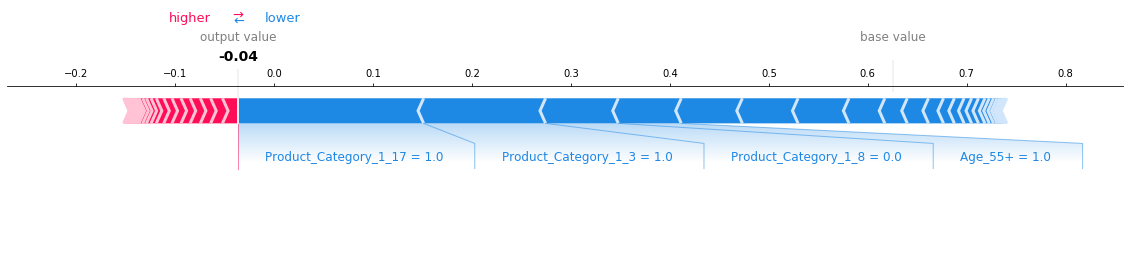

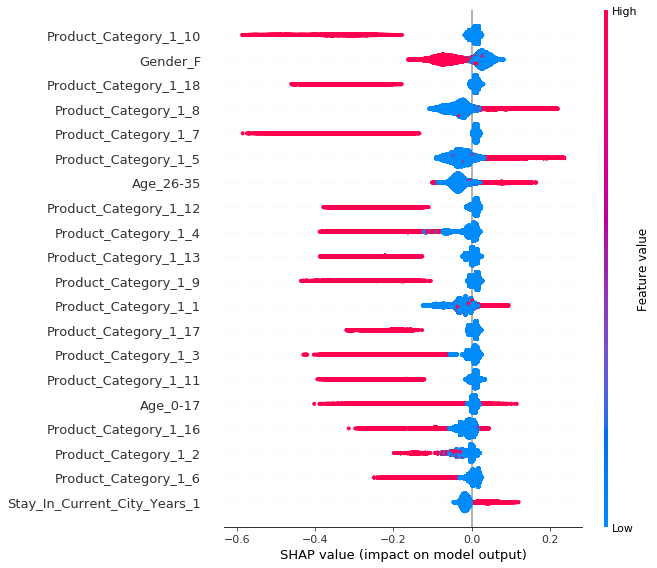

In [32]:
import xgboost
import shap

do_explain = True

# train XGBoost model
progress = dict()
watchlist  = [(xgboost.DMatrix(X_train, label=y_train),'train-rmse-mean'), (xgboost.DMatrix(X_test, label=y_test), 'eval-rmse-mean')]
model = xgboost.train({"learning_rate": 0.1}, xgboost.DMatrix(X_train, label=y_train), 200, watchlist, evals_result=progress, verbose_eval=10)

if do_explain:
    # explain the model's predictions using SHAP values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    # visualize the first prediction's explanation
    shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0], feature_names=data_categories.columns.values, matplotlib=True)
    plt.show()
    # need to replot (and not show) in order to be able to save as pdf
    shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0], feature_names=data_categories.columns.values, matplotlib=True, show=False)
    plt.savefig('shapforce.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.close()

    # summarize the effects of all the features
    shap.summary_plot(shap_values, X_test, feature_names=data_categories.columns.values)
    plt.show()
    shap.summary_plot(shap_values, X_test, feature_names=data_categories.columns.values, show=False)
    plt.savefig('shapsummary.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.close()

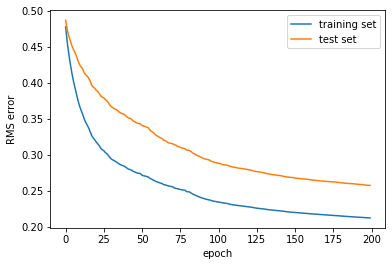

In [33]:
plt.plot(range(len(progress['train']['rmse-mean-rmse'])), progress['train']['rmse-mean-rmse'], label='training set')
plt.plot(range(len(progress['eval']['rmse-mean-rmse'])), progress['eval']['rmse-mean-rmse'], label='test set')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("RMS error")
plt.savefig("xgboost_training.pdf", dpi=300, bbox_inches='tight')